In [14]:
# importing variables from json:
import json
with open('input copy.json', 'r') as f:
    input_data = json.load(f)

In [15]:
!pip install keras-tuner matplotlib numpy pandas scikit-learn tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import keras_tuner as kt

In [17]:
# df = pd.read_csv(input_data['dataset_path1'])
df = pd.read_csv(input_data['dataset_path2'])

print("First 5 rows:")
display(df.head())

print("\nDataset shape:", df.shape)
print("\nBasic statistics:")
display(df.describe())

print("\nBasic Info:")
display(df.info())

First 5 rows:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,AWEIsh_mean,...,NormRed_mean*PanNDVI_mean,NormRed_mean*RedBlueNDVI_mean,NormRed_mean*SAVI_mean,PanNDVI_mean*PanNDVI_mean,PanNDVI_mean*RedBlueNDVI_mean,PanNDVI_mean*SAVI_mean,RedBlueNDVI_mean*RedBlueNDVI_mean,RedBlueNDVI_mean*SAVI_mean,SAVI_mean*SAVI_mean,Target
0,0.099653,0.38788,0.32204,0.015679,0.007154,0.023679,0.20406,0.042123,0.029575,0.104650,...,0.122853,0.156630,0.157776,0.411214,0.524275,0.528110,0.668421,0.673310,0.678235,433.490
1,0.062917,0.21818,0.22434,0.020886,0.013045,0.036076,0.14091,0.175420,0.106170,0.108160,...,0.126003,0.161143,0.163628,0.391964,0.501275,0.509007,0.641072,0.650961,0.661002,83.507
2,0.106330,0.21818,0.41896,0.028977,0.034632,0.047969,0.44808,0.325480,0.161070,0.061818,...,0.077800,0.087779,0.086966,0.671826,0.758004,0.750980,0.855237,0.847311,0.839459,263.380
3,0.031659,0.15152,0.28110,0.017399,0.032371,0.053789,0.21054,0.187920,0.100240,0.103680,...,0.126522,0.156773,0.159815,0.422149,0.523085,0.533233,0.648154,0.660729,0.673548,56.775
4,0.033796,0.23030,0.27841,0.017956,0.007300,0.019674,0.18146,0.030828,0.028489,0.103660,...,0.132629,0.173505,0.172110,0.384140,0.502532,0.498491,0.657413,0.652126,0.646882,188.760



Dataset shape: (557, 351)

Basic statistics:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,AWEIsh_mean,...,NormRed_mean*PanNDVI_mean,NormRed_mean*RedBlueNDVI_mean,NormRed_mean*SAVI_mean,PanNDVI_mean*PanNDVI_mean,PanNDVI_mean*RedBlueNDVI_mean,PanNDVI_mean*SAVI_mean,RedBlueNDVI_mean*RedBlueNDVI_mean,RedBlueNDVI_mean*SAVI_mean,SAVI_mean*SAVI_mean,Target
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,...,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.00000
mean,0.177335,0.516218,0.268200,0.077724,0.091579,0.088850,0.457139,0.294913,0.155115,0.182097,...,0.106637,0.172199,0.145405,0.416153,0.494271,0.488015,0.616034,0.597852,0.586479,268.66014
std,0.136919,0.180190,0.079977,0.114705,0.108214,0.105918,0.159086,0.117612,0.091425,0.200218,...,0.046572,0.095055,0.067662,0.268706,0.267518,0.278984,0.232942,0.261620,0.281160,137.69849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.079215,0.424240,0.228550,0.035422,0.049701,0.048628,0.352070,0.221480,0.112610,0.069079,...,0.077221,0.099588,0.095087,0.172798,0.283452,0.242879,0.468759,0.423994,0.374679,167.79000
50%,0.145340,0.545450,0.265130,0.045296,0.064865,0.061392,0.447570,0.287910,0.140600,0.102800,...,0.101638,0.152406,0.138435,0.450536,0.555451,0.551620,0.680625,0.679448,0.678202,260.59000
75%,0.235510,0.648480,0.304130,0.063862,0.085831,0.079590,0.556720,0.353340,0.177830,0.196730,...,0.129788,0.243846,0.203263,0.628659,0.702304,0.710028,0.787071,0.799438,0.806961,364.21000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.233224,0.386265,0.272177,1.000000,0.993180,1.000000,1.000000,0.999220,1.000000,672.75000



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Columns: 351 entries, area to Target
dtypes: float64(351)
memory usage: 1.5 MB


None

In [ ]:
print("\nCorrelation Matrix:")
corr_matrix = df.corr(numeric_only=True)
display(corr_matrix)

In [ ]:
# plt.figure(figsize=(12,8))
# sns.heatmap(corr_matrix,
#             annot=True,
#             cmap='coolwarm'
#             # fmt=".2f",
#             # linewidths=.5)
# plt.title('Feature Correlation Matrix')
# plt.show()

plt.figure(figsize=(200, 160))  # Larger figure size
sns.heatmap(corr_matrix,
            # annot=False,  # Remove annotations to reduce clutter
            cmap='coolwarm',
            # linewidths=0.1,  # Add thin lines between cells
            linecolor='gray')
plt.title('Feature Correlation Matrix', fontsize=18)
plt.xticks(fontsize=10, rotation=45)  # Adjust x-axis labels
plt.yticks(fontsize=10, rotation=0)  # Adjust y-axis labels
plt.show()

In [ ]:
# Correlation Analysis
print("\n\033[1m1. Correlation Analysis\033[0m")
numeric_df = df.select_dtypes(include=[np.number])

# Pearson correlation
pearson_corr = numeric_df.corr()
print("\nPearson Correlation Matrix:")
display(pearson_corr)

# Spearman correlation (for non-linear relationships)
spearman_corr = numeric_df.corr(method='spearman')
print("\nSpearman Rank Correlation Matrix:")
display(spearman_corr)

In [ ]:
# Visualization
print("\n\033[1m2. Visual Relationships\033[0m")

# Heatmap
# plt.figure(figsize=(12,8))
# sns.heatmap(pearson_corr,
#             annot=True,
#             cmap='coolwarm',
#             vmin=-1, vmax=1,
#             mask=np.triu(np.ones_like(pearson_corr)))
# plt.title('Correlation Heatmap (Pearson)')
# plt.show()

# Pairplot for multivariate analysis
sns.pairplot(df.sample(min(200, len(df)), random_state=1))
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [ ]:
# Statistical Testing
print("\n\033[1m3. Statistical Significance Testing\033[0m")

# For 2 numeric variables
if len(numeric_df.columns) >= 2:
    col1, col2 = numeric_df.columns[:2]
    r, p = stats.pearsonr(df[col1], df[col2])
    print(f"\nPearson test between {col1} and {col2}:")
    print(f"Correlation Coefficient: {r:.3f}")
    print(f"P-value: {p:.4f}")

In [ ]:
# Categorical Relationships
print("\n\033[1m4. Categorical Analysis\033[0m")

# For categorical vs numerical
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
if len(categorical_cols) > 0 and len(numeric_df.columns) > 0:
    cat_var = categorical_cols[0]
    num_var = numeric_df.columns[0]

    plt.figure(figsize=(10,6))
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'{cat_var} vs {num_var}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
print("\n\033[1m5. Advanced Relationships\033[0m")

# Cross-correlation (lagged relationships)
if len(numeric_df.columns) >= 2:
    col1, col2 = numeric_df.columns[:2]
    cross_corr = np.correlate(df[col1], df[col2], mode='full')
    plt.plot(cross_corr)
    plt.title(f'Cross-correlation between {col1} and {col2}')
    plt.xlabel('Lag')
    plt.show()

# Model Training

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# data = pd.read_csv(input_data['dataset_path1'])
data = pd.read_csv(input_data['dataset_path2'])

X = data.drop("Target", axis=1).values
y = data["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
# ### not scale x
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Normalize the target variable
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# TRY DECREASE LAYER, Python class, plotting everything(loss,lr,acc, etc),
# activity_regularizer l1 play with it and relation with lr, powerpoint to it,
# Add Sparse

def build_model(hp):
    input_dim = X_train.shape[1]  # Number of input features

    # Hyperparameters to tune:
    encoder_units = hp.Int('encoder_units', min_value=8, max_value=256, step=2)
    decoder_units = hp.Int('decoder_units', min_value=8, max_value=256, step=2)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.8, step=0.1)
    latent_dim = hp.Int('latent_dim', min_value=2, max_value=128, step=2)
    l1_reg = hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log')
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # Input layer
    input_layer = keras.Input(shape=(input_dim,))

    # Encoder
    x = layers.Dense(encoder_units, activation='relu')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    latent = layers.Dense(latent_dim, activation='linear', activity_regularizer=regularizers.l1(l1_reg), name='latent')(x)

    # Decoder
    x = layers.Dense(decoder_units, activation='relu')(latent)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    output_layer = layers.Dense(input_dim, activation='linear')(x)

    # Define the autoencoder model
    model = keras.Model(inputs=input_layer, outputs=output_layer, name="sparse_autoencoder")

    # Compile the model with the tunable learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse')

    return model

# Set up the Keras Tuner with Random Search (other tuners like BayesianOptimization are also available)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,           # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build for each trial
    directory='hpo_dir',
    project_name='sparse_autoencoder'
)

# Print a summary of the search space
tuner.search_space_summary()

# Run the hyperparameter search.
# Here we train the model as an autoencoder (input is the same as output).
tuner.search(X_train, X_train, epochs=500, validation_split=0.1)

# Retrieve the best model found by the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Display a summary of the best model architecture
best_model.summary()


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Build the autoencoder with the best hyperparameters and train it
autoencoder = best_model
history = autoencoder.fit(X_train, X_train,
                          epochs=500,
                          batch_size=8,
                          validation_split=0.1,
                          callbacks=[early_stop],
                          verbose=1)

# Confirm that it’s a Sparse Autoencoder (the latent layer includes an L1 regularizer)
print("Sparse Autoencoder defined with L1 regularization on the latent layer (named 'latent').")

Trial 14 Complete [00h 02m 23s]
val_loss: 0.30380791425704956

Best val_loss So Far: 0.04810994490981102
Total elapsed time: 00h 29m 56s

Search: Running Trial #15

Value             |Best Value So Far |Hyperparameter
190               |172               |encoder_units
22                |236               |decoder_units
0.8               |0                 |dropout_rate
108               |98                |latent_dim
4.4264e-05        |0.0001614         |l1_reg
0.0090108         |0.00097086        |learning_rate

Epoch 1/500


In [ ]:
# 4. Create the Encoder Model for Feature Extraction
# Create a model to extract the latent features
encoder = keras.Model(inputs=best_model.input, outputs=best_model.get_layer("latent").output, name="encoder")
latent_train = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# # 5. Build and Train a Downstream Regression Model for AGB Prediction
# def build_regressor_model(hp):
#     reg_input = keras.Input(shape=(latent_train.shape[1],))

#     units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16, default=32)
#     units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8, default=16)
#     dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
#     learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)

#     x = layers.Dense(units_1, activation='relu')(reg_input)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     x = layers.Dense(units_2, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     reg_output = layers.Dense(1, activation='linear')(x)

#     regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")

#     regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                       loss='mse', metrics=['mae'])
#     return regressor



# # Then set up the tuner:
# tuner_regressor = kt.RandomSearch(
#     build_regressor_model,
#     objective='val_loss',
#     max_trials=50,
#     executions_per_trial=1,
#     directory='hpo_regressor_dir2',
#     project_name='regressor_agb'
# )

# tuner_regressor.search(latent_train, y_train, epochs=300, validation_split=0.1)

# best_regressor = tuner_regressor.get_best_models(num_models=1)[0]
# best_regressor.summary()


# reg_epochs = 500
# best_regressor.fit(latent_train, y_train,
#               epochs=reg_epochs,
#               batch_size=8,
#               validation_split=0.1,
#               verbose=1)

In [ ]:
# y_pred_scaled = best_regressor.predict(latent_test).flatten()
# # Inverse transform predictions and true values to get original scale
# y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# mse_value = mean_squared_error(y_test_inv, y_pred)
# r2 = r2_score(y_test_inv, y_pred)
# print(f"Test MSE for AGB prediction: {mse_value:.4f}")
# print(f"Test R^2 for AGB prediction: {r2:.4f}")

In [ ]:
# # 5. Build and Train Downstream Regression Models for AGB Prediction
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import KFold, cross_val_predict
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt

# # 5.1 Neural Network Regressor (keeping your existing code)
# def build_regressor_model(hp):
#     reg_input = keras.Input(shape=(latent_train.shape[1],))

#     units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16, default=32)
#     units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8, default=16)
#     dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
#     learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)

#     x = layers.Dense(units_1, activation='relu')(reg_input)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     x = layers.Dense(units_2, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     reg_output = layers.Dense(1, activation='linear')(x)

#     regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")

#     regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                       loss='mse', metrics=['mae'])
#     return regressor

# # Set up the tuner for NN
# tuner_regressor = kt.RandomSearch(
#     build_regressor_model,
#     objective='val_loss',
#     max_trials=50,
#     executions_per_trial=1,
#     directory='hpo_regressor_dir2',
#     project_name='regressor_agb'
# )

# tuner_regressor.search(latent_train, y_train, epochs=300, validation_split=0.1)

# best_regressor = tuner_regressor.get_best_models(num_models=1)[0]
# best_regressor.summary()

# reg_epochs = 500
# best_regressor.fit(latent_train, y_train,
#               epochs=reg_epochs,
#               batch_size=8,
#               validation_split=0.1,
#               verbose=1)

# # 5.2 Random Forest Regressor
# print("\n--- Training Random Forest Regressor ---")
# # Define RF model with hyperparameters
# rf_model = RandomForestRegressor(
#     n_estimators=100,
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     max_features="sqrt",  # Changed from 'auto' to 'sqrt'
#     n_jobs=-1,
#     random_state=42
# )


# # Train the RF model
# rf_model.fit(latent_train, y_train.ravel())

# # 5.3 Implement 5-fold Cross-Validation for both models
# print("\n--- Performing 5-fold Cross-Validation ---")
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Function to evaluate models with cross-validation
# def evaluate_model_cv(model, X, y, model_name="Model"):
#     # For storing results
#     y_true_all = []
#     y_pred_all = []
    
#     fold = 1
    
#     # For neural network
#     if model_name == "Neural Network":
#         for train_idx, val_idx in kf.split(X):
#             X_train_fold, X_val_fold = X[train_idx], X[val_idx]
#             y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
#             # Clone the model architecture for each fold
#             fold_model = keras.models.clone_model(model)
#             fold_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#                               loss='mse', metrics=['mae'])
            
#             # Train the model
#             fold_model.fit(X_train_fold, y_train_fold, 
#                           epochs=100,  # Reduced epochs for CV
#                           batch_size=8, 
#                           verbose=0)
            
#             # Predict
#             y_pred_fold = fold_model.predict(X_val_fold).flatten()
            
#             # Store results
#             y_true_all.extend(y_val_fold)
#             y_pred_all.extend(y_pred_fold)
            
#             print(f"Fold {fold} completed")
#             fold += 1
    
#     # For scikit-learn models (Random Forest)
#     else:
#         y_pred_all = cross_val_predict(model, X, y.ravel(), cv=kf)
#         y_true_all = y.ravel()
    
#     # Convert to numpy arrays
#     y_true_all = np.array(y_true_all)
#     y_pred_all = np.array(y_pred_all)
    
#     # Inverse transform to get original scale
#     y_true_inv = y_scaler.inverse_transform(y_true_all.reshape(-1, 1)).flatten()
#     y_pred_inv = y_scaler.inverse_transform(y_pred_all.reshape(-1, 1)).flatten()
    
#     # Calculate metrics
#     r2 = r2_score(y_true_inv, y_pred_inv)
#     mae = mean_absolute_error(y_true_inv, y_pred_inv)
#     mse = mean_squared_error(y_true_inv, y_pred_inv)
#     rmse = np.sqrt(mse)
    
#     print(f"\n--- {model_name} 5-fold CV Results ---")
#     print(f"R² Score: {r2:.4f}")
#     print(f"MAE: {mae:.4f}")
#     print(f"MSE: {mse:.4f}")
#     print(f"RMSE: {rmse:.4f}")
    
#     return y_true_inv, y_pred_inv, r2, mae, mse, rmse

# # Evaluate both models with cross-validation
# nn_results = evaluate_model_cv(best_regressor, latent_train, y_train, "Neural Network")
# rf_results = evaluate_model_cv(rf_model, latent_train, y_train, "Random Forest")

# # 5.4 Final evaluation on test set
# print("\n--- Final Evaluation on Test Set ---")

# # Neural Network predictions
# y_pred_nn = best_regressor.predict(latent_test).flatten()
# y_pred_nn_inv = y_scaler.inverse_transform(y_pred_nn.reshape(-1, 1)).flatten()

# # Random Forest predictions
# y_pred_rf = rf_model.predict(latent_test)
# y_pred_rf_inv = y_scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()

# # True values
# y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# # Calculate metrics for Neural Network
# nn_r2 = r2_score(y_test_inv, y_pred_nn_inv)
# nn_mae = mean_absolute_error(y_test_inv, y_pred_nn_inv)
# nn_mse = mean_squared_error(y_test_inv, y_pred_nn_inv)
# nn_rmse = np.sqrt(nn_mse)

# # Calculate metrics for Random Forest
# rf_r2 = r2_score(y_test_inv, y_pred_rf_inv)
# rf_mae = mean_absolute_error(y_test_inv, y_pred_rf_inv)
# rf_mse = mean_squared_error(y_test_inv, y_pred_rf_inv)
# rf_rmse = np.sqrt(rf_mse)

# # Print results
# print("\n--- Neural Network Test Results ---")
# print(f"R² Score: {nn_r2:.4f}")
# print(f"MAE: {nn_mae:.4f}")
# print(f"MSE: {nn_mse:.4f}")
# print(f"RMSE: {nn_rmse:.4f}")

# print("\n--- Random Forest Test Results ---")
# print(f"R² Score: {rf_r2:.4f}")
# print(f"MAE: {rf_mae:.4f}")
# print(f"MSE: {rf_mse:.4f}")
# print(f"RMSE: {rf_rmse:.4f}")

# # 5.5 Visualize predictions
# plt.figure(figsize=(12, 5))

# # Neural Network
# plt.subplot(1, 2, 1)
# plt.scatter(y_test_inv, y_pred_nn_inv, alpha=0.7)
# plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--')
# plt.xlabel('Observed AGB')
# plt.ylabel('Predicted AGB')
# plt.title(f'Neural Network (R² = {nn_r2:.4f})')

# # Random Forest
# plt.subplot(1, 2, 2)
# plt.scatter(y_test_inv, y_pred_rf_inv, alpha=0.7)
# plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--')
# plt.xlabel('Observed AGB')
# plt.ylabel('Predicted AGB')
# plt.title(f'Random Forest (R² = {rf_r2:.4f})')

# plt.tight_layout()
# plt.savefig('model_comparison.png', dpi=300)
# plt.show()


In [ ]:
# make graphs

Trial 50 Complete [00h 01m 20s]
val_loss: 0.22160238027572632

Best val_loss So Far: 0.15225134789943695
Total elapsed time: 02h 09m 44s


c:\Users\kaxit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3421 - mae: 0.4758 - val_loss: 0.2814 - val_mae: 0.4025
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4041 - mae: 0.4877 - val_loss: 0.3827 - val_mae: 0.4710
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4298 - mae: 0.5391 - val_loss: 0.4770 - val_mae: 0.4981
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4217 - mae: 0.5032 - val_loss: 0.2598 - val_mae: 0.3925
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3821 - mae: 0.4847 - val_loss: 0.2640 - val_mae: 0.3903
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3692 - mae: 0.4770 - val_loss: 0.2203 - val_mae: 0.3640
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4122 - mae: 0.5163 - val_loss: 0.2834 - val_mae: 0.4128
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3300 - mae: 0.4589 - val_loss: 0.3322 - val_mae: 0.4404
Epoch 9/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.30

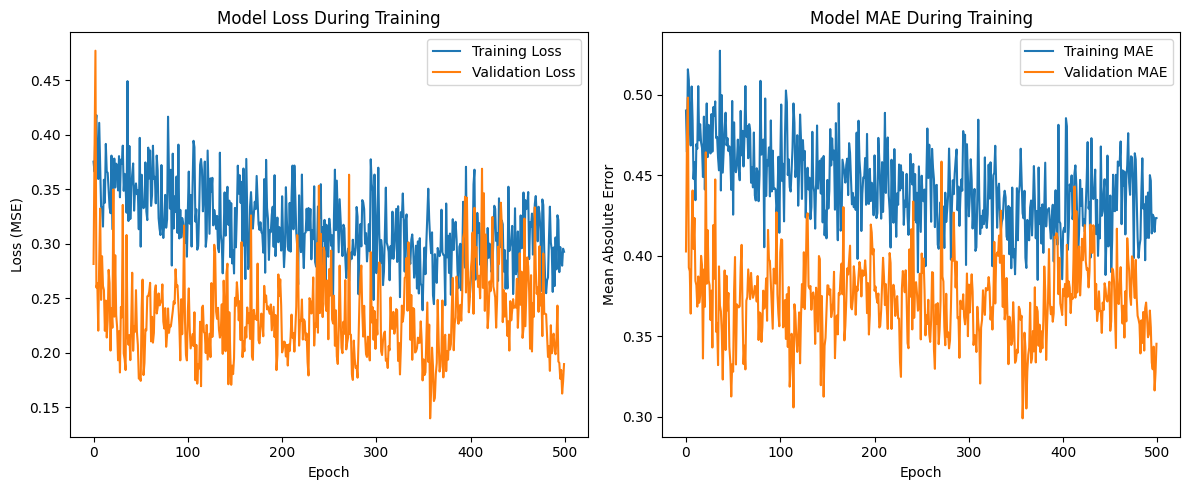


--- Training Random Forest Regressor ---


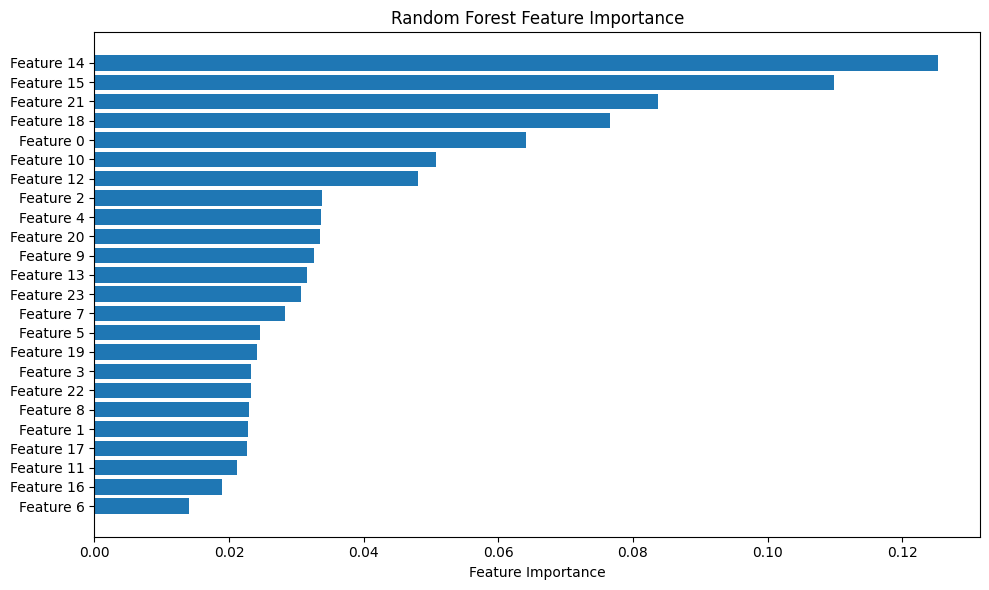


--- Performing 5-fold Cross-Validation ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Fold 1 completed, R² = 0.6235
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000271CDCC94E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Fold 2 completed, R² = 0.6061
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Fold 3 completed,

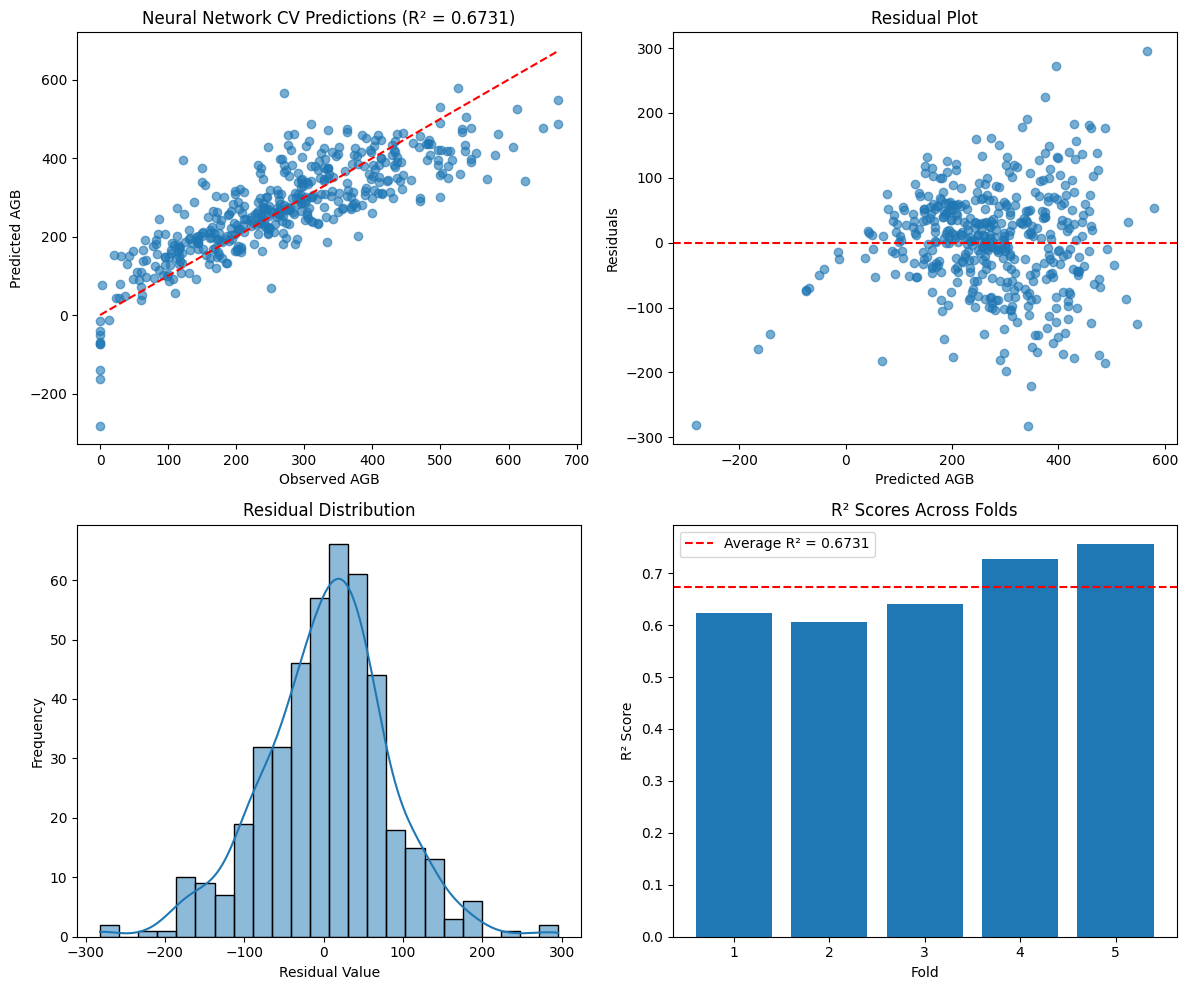

Fold 1 completed, R² = 0.5974
Fold 2 completed, R² = 0.6523
Fold 3 completed, R² = 0.5628
Fold 4 completed, R² = 0.6618
Fold 5 completed, R² = 0.7577

--- Random Forest 5-fold CV Results ---
R² Score: 0.6454
MAE: 65.1428
MSE: 6830.5660
RMSE: 82.6472


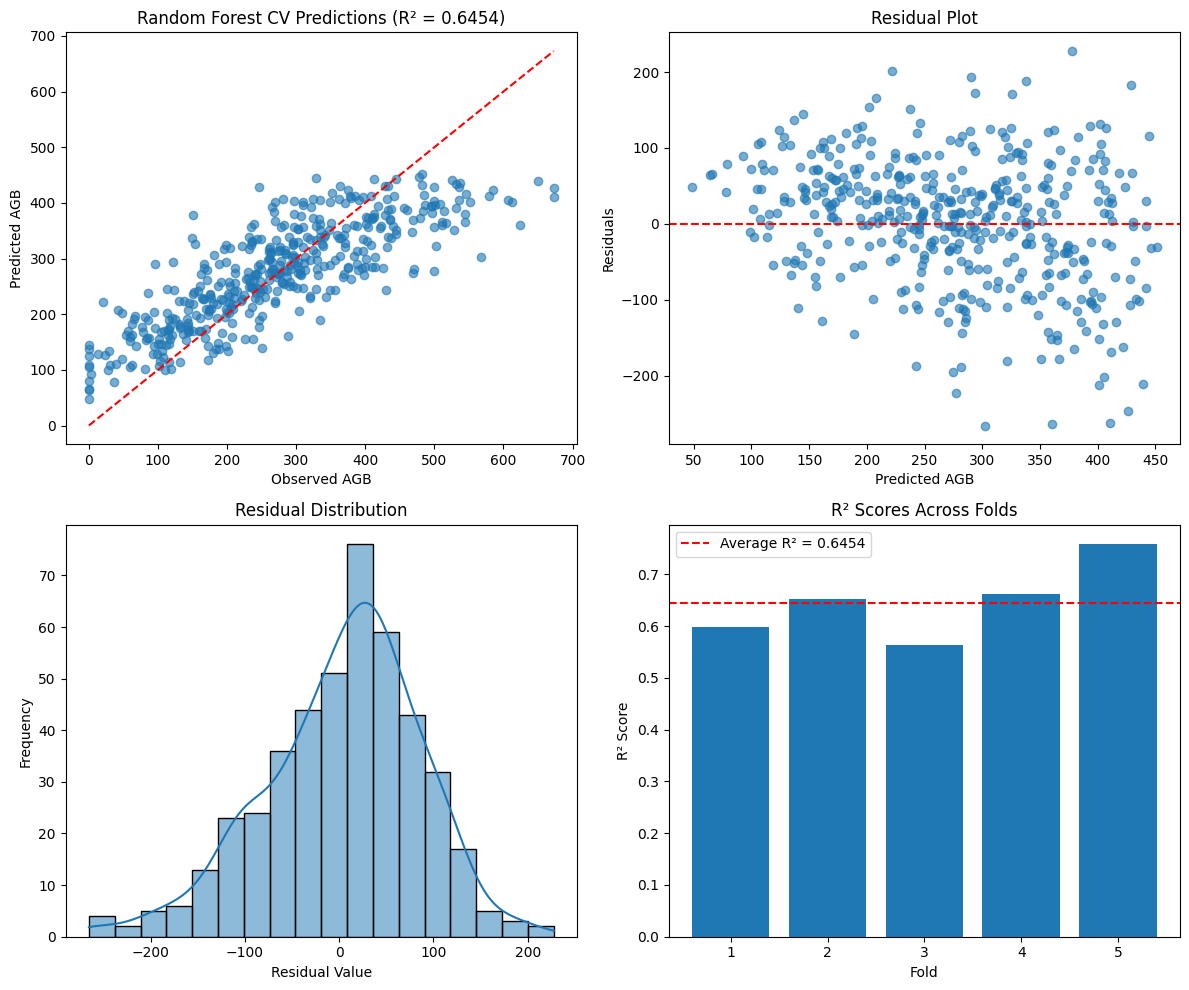


--- Final Evaluation on Test Set ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

--- Neural Network Test Results ---
R² Score: 0.5608
MAE: 65.8859
MSE: 7684.6671
RMSE: 87.6622

--- Random Forest Test Results ---
R² Score: 0.6439
MAE: 60.9277
MSE: 6230.7514
RMSE: 78.9351


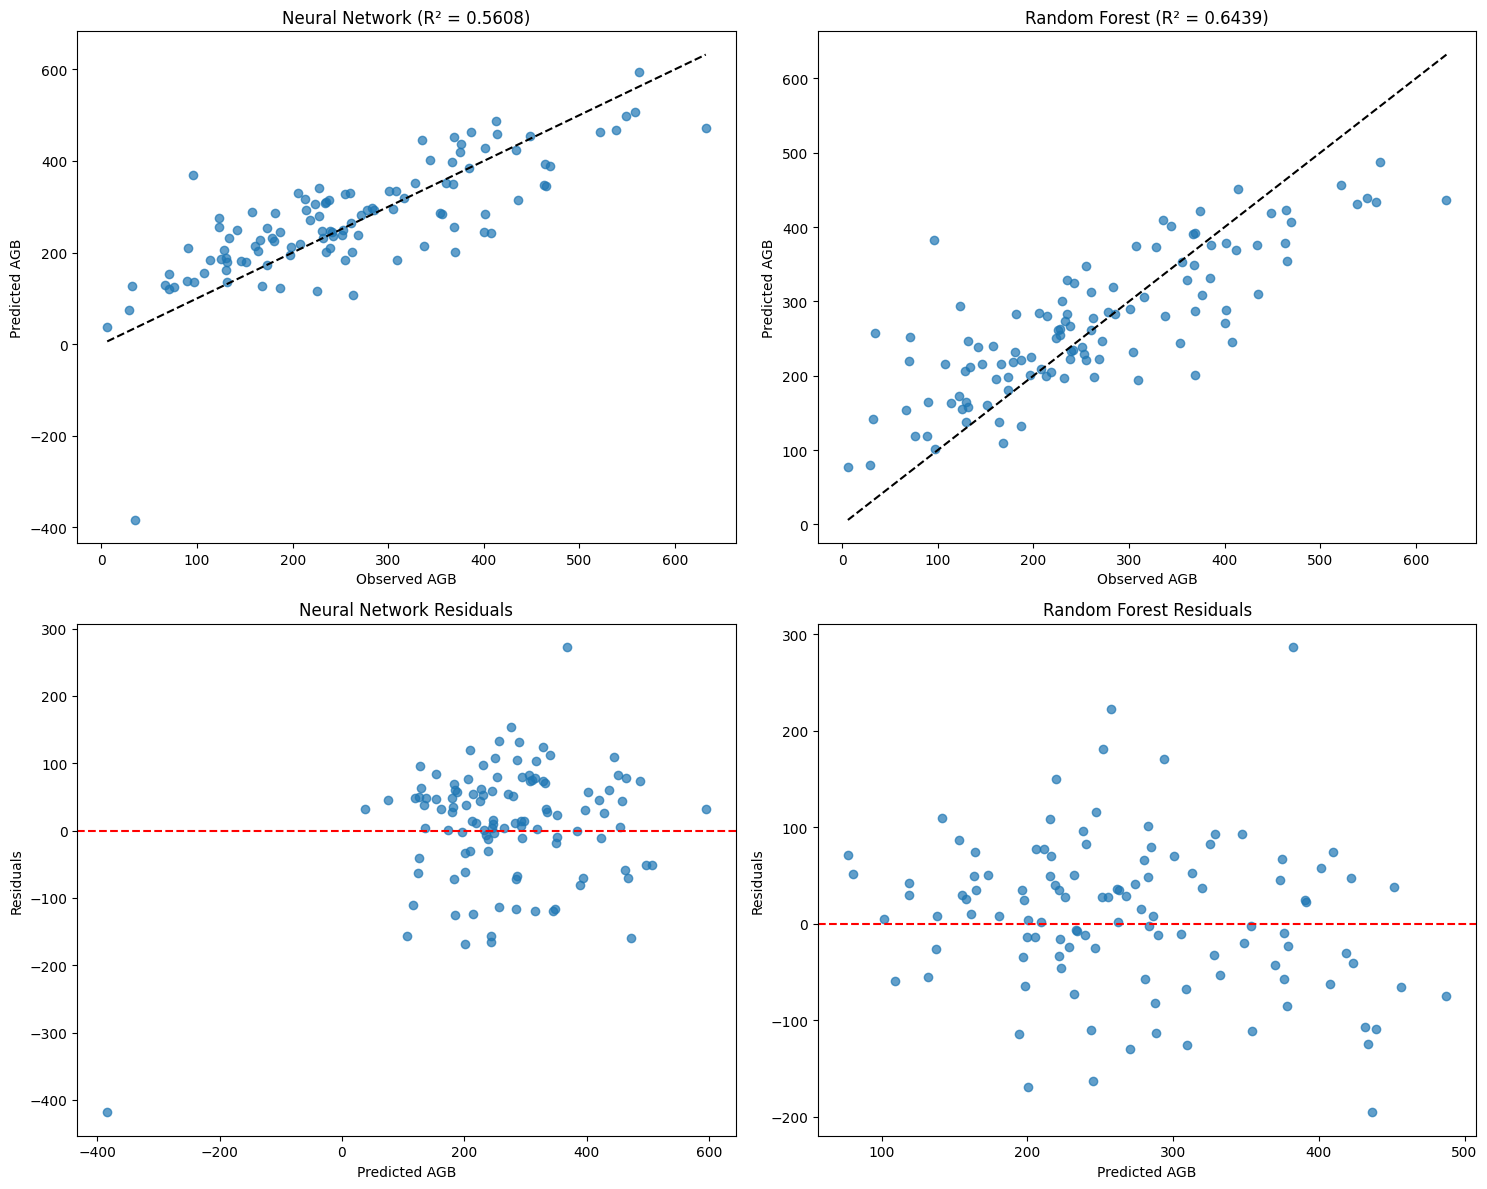

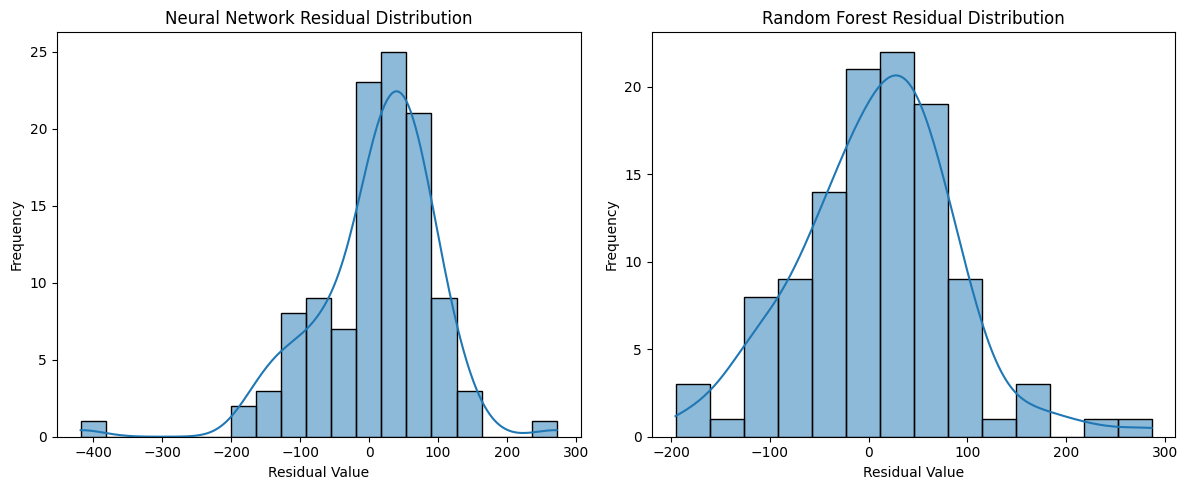

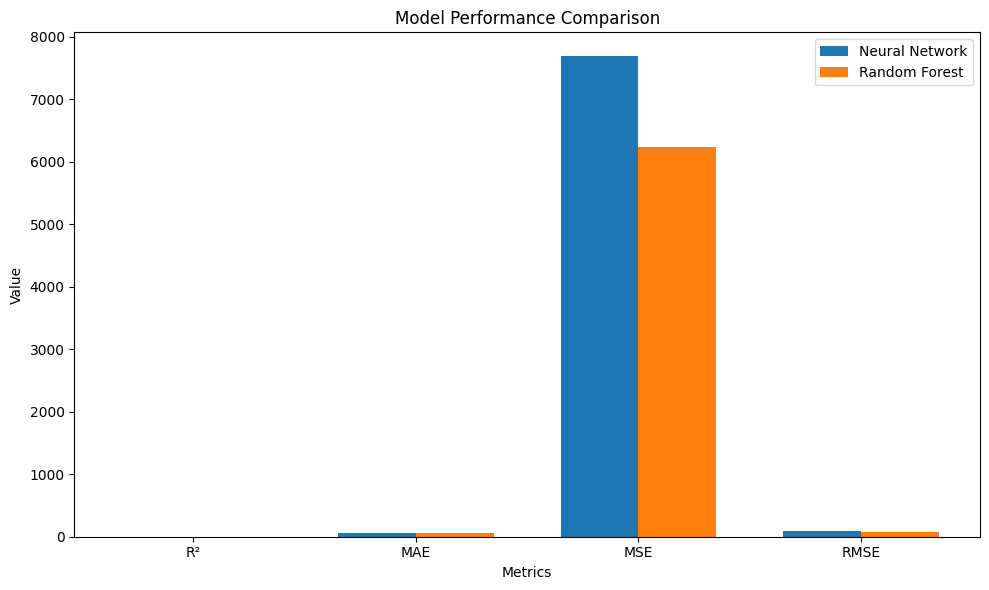

In [ ]:
# 5. Build and Train Downstream Regression Models for AGB Prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# 5.1 Neural Network Regressor (keeping your existing code)
def build_regressor_model(hp):
    reg_input = keras.Input(shape=(latent_train.shape[1],))

    units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16, default=32)
    units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8, default=16)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)

    x = layers.Dense(units_1, activation='relu')(reg_input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units_2, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    reg_output = layers.Dense(1, activation='linear')(x)

    regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")

    regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='mse', metrics=['mae'])
    return regressor

# Set up the tuner for NN
tuner_regressor = kt.RandomSearch(
    build_regressor_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='hpo_regressor_dir2',
    project_name='regressor_agb'
)

tuner_regressor.search(latent_train, y_train, epochs=300, validation_split=0.1)

best_regressor = tuner_regressor.get_best_models(num_models=1)[0]
best_regressor.summary()

reg_epochs = 500
history = best_regressor.fit(latent_train, y_train,
              epochs=reg_epochs,
              batch_size=8,
              validation_split=0.1,
              verbose=1)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.tight_layout()
plt.savefig('nn_training_history.png', dpi=300)
plt.show()

# 5.2 Random Forest Regressor
print("\n--- Training Random Forest Regressor ---")
# Define RF model with hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",  # Changed from 'auto' to 'sqrt'
    n_jobs=-1,
    random_state=42
)

# Train the RF model
rf_model.fit(latent_train, y_train.ravel())

# Visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300)
plt.show()

# 5.3 Implement 5-fold Cross-Validation for both models
print("\n--- Performing 5-fold Cross-Validation ---")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate models with cross-validation
def evaluate_model_cv(model, X, y, model_name="Model"):
    # For storing results
    y_true_all = []
    y_pred_all = []
    fold_r2_scores = []
    
    fold = 1
    
    # For neural network
    if model_name == "Neural Network":
        for train_idx, val_idx in kf.split(X):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            # Clone the model architecture for each fold
            fold_model = keras.models.clone_model(model)
            fold_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                              loss='mse', metrics=['mae'])
            
            # Train the model
            fold_model.fit(X_train_fold, y_train_fold, 
                          epochs=100,  # Reduced epochs for CV
                          batch_size=8, 
                          verbose=0)
            
            # Predict
            y_pred_fold = fold_model.predict(X_val_fold).flatten()
            
            # Store results
            y_true_all.extend(y_val_fold)
            y_pred_all.extend(y_pred_fold)
            
            # Calculate fold R2
            y_true_fold_inv = y_scaler.inverse_transform(y_val_fold.reshape(-1, 1)).flatten()
            y_pred_fold_inv = y_scaler.inverse_transform(y_pred_fold.reshape(-1, 1)).flatten()
            fold_r2 = r2_score(y_true_fold_inv, y_pred_fold_inv)
            fold_r2_scores.append(fold_r2)
            
            print(f"Fold {fold} completed, R² = {fold_r2:.4f}")
            fold += 1
    
    # For scikit-learn models (Random Forest)
    else:
        for train_idx, val_idx in kf.split(X):
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            # Train model on this fold
            fold_model = RandomForestRegressor(
                n_estimators=100, max_features="sqrt", random_state=42, n_jobs=-1)
            fold_model.fit(X_train_fold, y_train_fold.ravel())
            
            # Predict
            y_pred_fold = fold_model.predict(X_val_fold)
            
            # Calculate fold R2
            y_true_fold_inv = y_scaler.inverse_transform(y_val_fold.reshape(-1, 1)).flatten()
            y_pred_fold_inv = y_scaler.inverse_transform(y_pred_fold.reshape(-1, 1)).flatten()
            fold_r2 = r2_score(y_true_fold_inv, y_pred_fold_inv)
            fold_r2_scores.append(fold_r2)
            
            print(f"Fold {fold} completed, R² = {fold_r2:.4f}")
            fold += 1
        
        y_pred_all = cross_val_predict(model, X, y.ravel(), cv=kf)
        y_true_all = y.ravel()
    
    # Convert to numpy arrays
    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)
    
    # Inverse transform to get original scale
    y_true_inv = y_scaler.inverse_transform(y_true_all.reshape(-1, 1)).flatten()
    y_pred_inv = y_scaler.inverse_transform(y_pred_all.reshape(-1, 1)).flatten()
    
    # Calculate metrics
    r2 = r2_score(y_true_inv, y_pred_inv)
    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    mse = mean_squared_error(y_true_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    
    print(f"\n--- {model_name} 5-fold CV Results ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    # Visualize cross-validation results
    plt.figure(figsize=(12, 10))
    
    # Plot 1: Scatter plot of predictions vs actual values
    plt.subplot(2, 2, 1)
    plt.scatter(y_true_inv, y_pred_inv, alpha=0.6)
    plt.plot([y_true_inv.min(), y_true_inv.max()], [y_true_inv.min(), y_true_inv.max()], 'r--')
    plt.xlabel('Observed AGB')
    plt.ylabel('Predicted AGB')
    plt.title(f'{model_name} CV Predictions (R² = {r2:.4f})')
    
    # Plot 2: Residual plot
    residuals = y_pred_inv - y_true_inv
    plt.subplot(2, 2, 2)
    plt.scatter(y_pred_inv, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted AGB')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    # Plot 3: Residual distribution
    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')
    
    # Plot 4: R² scores across folds
    plt.subplot(2, 2, 4)
    plt.bar(range(1, 6), fold_r2_scores)
    plt.axhline(y=r2, color='r', linestyle='--', label=f'Average R² = {r2:.4f}')
    plt.xlabel('Fold')
    plt.ylabel('R² Score')
    plt.title('R² Scores Across Folds')
    plt.xticks(range(1, 6))
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_cv_results.png', dpi=300)
    plt.show()
    
    return y_true_inv, y_pred_inv, r2, mae, mse, rmse

# Evaluate both models with cross-validation
nn_results = evaluate_model_cv(best_regressor, latent_train, y_train, "Neural Network")
rf_results = evaluate_model_cv(rf_model, latent_train, y_train, "Random Forest")

# 5.4 Final evaluation on test set
print("\n--- Final Evaluation on Test Set ---")

# Neural Network predictions
y_pred_nn = best_regressor.predict(latent_test).flatten()
y_pred_nn_inv = y_scaler.inverse_transform(y_pred_nn.reshape(-1, 1)).flatten()

# Random Forest predictions
y_pred_rf = rf_model.predict(latent_test)
y_pred_rf_inv = y_scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()

# True values
y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate metrics for Neural Network
nn_r2 = r2_score(y_test_inv, y_pred_nn_inv)
nn_mae = mean_absolute_error(y_test_inv, y_pred_nn_inv)
nn_mse = mean_squared_error(y_test_inv, y_pred_nn_inv)
nn_rmse = np.sqrt(nn_mse)

# Calculate metrics for Random Forest
rf_r2 = r2_score(y_test_inv, y_pred_rf_inv)
rf_mae = mean_absolute_error(y_test_inv, y_pred_rf_inv)
rf_mse = mean_squared_error(y_test_inv, y_pred_rf_inv)
rf_rmse = np.sqrt(rf_mse)

# Print results
print("\n--- Neural Network Test Results ---")
print(f"R² Score: {nn_r2:.4f}")
print(f"MAE: {nn_mae:.4f}")
print(f"MSE: {nn_mse:.4f}")
print(f"RMSE: {nn_rmse:.4f}")

print("\n--- Random Forest Test Results ---")
print(f"R² Score: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")

# 5.5 Visualize test set predictions
plt.figure(figsize=(15, 12))

# Neural Network scatter plot
plt.subplot(2, 2, 1)
plt.scatter(y_test_inv, y_pred_nn_inv, alpha=0.7)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--')
plt.xlabel('Observed AGB')
plt.ylabel('Predicted AGB')
plt.title(f'Neural Network (R² = {nn_r2:.4f})')

# Random Forest scatter plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_inv, y_pred_rf_inv, alpha=0.7)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--')
plt.xlabel('Observed AGB')
plt.ylabel('Predicted AGB')
plt.title(f'Random Forest (R² = {rf_r2:.4f})')

# Neural Network residual plot
nn_residuals = y_pred_nn_inv - y_test_inv
plt.subplot(2, 2, 3)
plt.scatter(y_pred_nn_inv, nn_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted AGB')
plt.ylabel('Residuals')
plt.title('Neural Network Residuals')

# Random Forest residual plot
rf_residuals = y_pred_rf_inv - y_test_inv
plt.subplot(2, 2, 4)
plt.scatter(y_pred_rf_inv, rf_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted AGB')
plt.ylabel('Residuals')
plt.title('Random Forest Residuals')

plt.tight_layout()
plt.savefig('model_comparison_test.png', dpi=300)
plt.show()

# 5.6 Compare residual distributions
plt.figure(figsize=(12, 5))

# Neural Network residual distribution
plt.subplot(1, 2, 1)
sns.histplot(nn_residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Neural Network Residual Distribution')

# Random Forest residual distribution
plt.subplot(1, 2, 2)
sns.histplot(rf_residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Random Forest Residual Distribution')

plt.tight_layout()
plt.savefig('residual_distributions.png', dpi=300)
plt.show()

# 5.7 Compare model metrics
metrics = ['R²', 'MAE', 'MSE', 'RMSE']
nn_metrics = [nn_r2, nn_mae, nn_mse, nn_rmse]
rf_metrics = [rf_r2, rf_mae, rf_mse, rf_rmse]

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, nn_metrics, width, label='Neural Network')
plt.bar(x + width/2, rf_metrics, width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300)
plt.show()



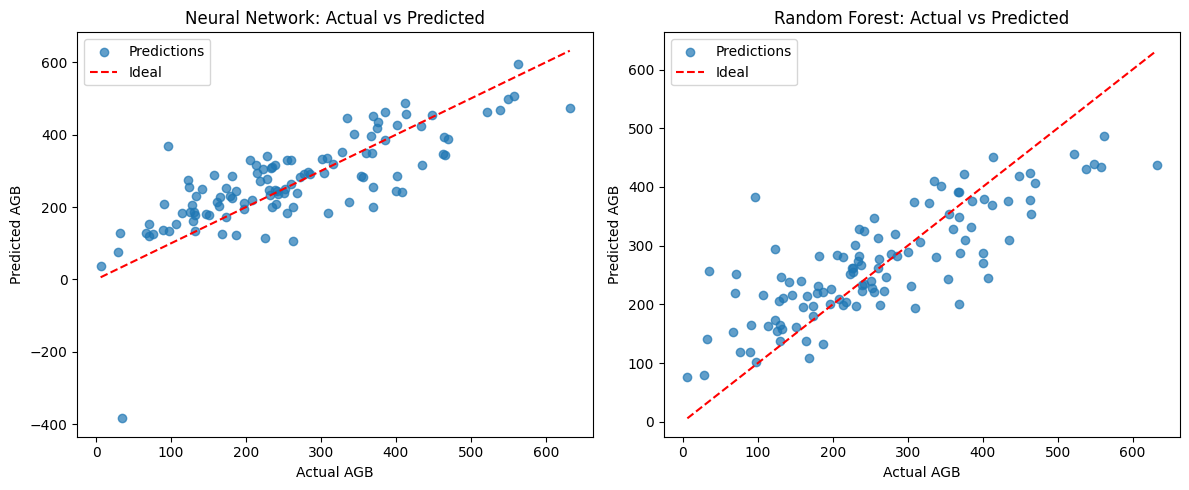

In [ ]:
# Actual vs Predicted graphs
plt.figure(figsize=(12, 5))

# Neural Network actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test_inv, y_pred_nn_inv, alpha=0.7, label='Predictions')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--', label='Ideal')
plt.xlabel('Actual AGB')
plt.ylabel('Predicted AGB')
plt.title('Neural Network: Actual vs Predicted')
plt.legend()

# Random Forest actual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test_inv, y_pred_rf_inv, alpha=0.7, label='Predictions')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--', label='Ideal')
plt.xlabel('Actual AGB')
plt.ylabel('Predicted AGB')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance
import numpy as np

# 1. Training History Visualization
def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    if 'mae' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title(f'{title} - MAE')
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
        plt.legend()

    plt.tight_layout()
    plt.savefig(f'{title}_training_history.png')
    plt.show()

# Plot autoencoder training history
plot_training_history(history, "Autoencoder")

# Plot regressor training history (after training best_regressor)
regressor_history = best_regressor.fit(latent_train, y_train,
                                      epochs=reg_epochs,
                                      batch_size=32,
                                      validation_split=0.1,
                                      verbose=1)
plot_training_history(regressor_history, "Regressor")

# 2. Latent Space Visualization
def visualize_latent_space(latent_rep, y, title):
    plt.figure(figsize=(12, 5))

    # PCA Visualization
    plt.subplot(1, 2, 1)
    pca = PCA(n_components=2)
    latent_pca = pca.fit_transform(latent_rep)
    plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Target Value')
    plt.title(f'{title} - PCA Projection')

    # t-SNE Visualization
    plt.subplot(1, 2, 2)
    tsne = TSNE(n_components=2, perplexity=30)
    latent_tsne = tsne.fit_transform(latent_rep)
    plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Target Value')
    plt.title(f'{title} - t-SNE Projection')

    plt.tight_layout()
    plt.savefig(f'{title}_latent_space.png')
    plt.show()

visualize_latent_space(latent_train, y_train, "Training_Latent_Space")

# 3. Prediction Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred, alpha=0.6)
plt.plot([min(y_test_inv), max(y_test_inv)],
         [min(y_test_inv), max(y_test_inv)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² = {r2:.2f})')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

# 4. Residual Plot
residuals = y_test_inv - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True,
             line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.savefig('residual_plot.png')
plt.show()

# # 5. Feature Importance (Permutation Importance)
# from sklearn.metrics import mean_squared_error

# result = permutation_importance(
#     best_regressor, latent_test, y_test_inv,
#     n_repeats=10, random_state=42,
#     scoring='neg_mean_squared_error'
# )


# plt.figure(figsize=(10, 6))
# plt.boxplot(result.importances[sorted_idx].T,
#             vert=False, labels=np.arange(latent_train.shape[1])[sorted_idx])
# plt.title("Permutation Importance (Latent Features)")
# plt.xlabel("Importance")
# plt.ylabel("Latent Feature Index")
# plt.savefig('feature_importance.png')
# plt.show()

# 6. Model Architecture Visualization
from tensorflow.keras.utils import plot_model

# Visualize autoencoder
plot_model(best_model, to_file='autoencoder_architecture.png',
          show_shapes=True, show_layer_names=True)

# Visualize regressor
plot_model(best_regressor, to_file='regressor_architecture.png',
          show_shapes=True, show_layer_names=True)

# 7. Hyperparameter Optimization Results
def plot_hpo_results(tuner):
    results = tuner.oracle.get_best_trials(num_trials=10)
    hp_names = list(tuner.get_best_hyperparameters()[0].values.keys())

    plt.figure(figsize=(15, 8))
    for i, hp_name in enumerate(hp_names):
        plt.subplot(2, 4, i+1)
        values = [t.hyperparameters.values[hp_name] for t in results]
        losses = [t.score for t in results]
        plt.scatter(values, losses)
        plt.title(hp_name)
        plt.xlabel('Value')
        plt.ylabel('Validation Loss')

    plt.tight_layout()
    plt.savefig('hpo_results.png')
    plt.show()

plot_hpo_results(tuner)
plot_hpo_results(tuner_regressor)


==================== Starting 5-Fold Cross-Validation ====================

Fold 1/5
Training autoencoder...
Reloading Tuner from hpo_dir_cv\sparse_autoencoder_cv\tuner0.json
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training regressor...
Reloading Tuner from hpo_regressor_dir_cv\regressor_cv\tuner0.json
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Fold 1 Results:
  R² Score: 0.8481
  MAE: 58.4883
  MSE: 6393.4330
  RMSE: 79.9589

Fold 2/5
Training autoencoder...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training regressor...
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step
Fold 2 Results:
  R² Score: 0.7753
  MAE: 65.6475
  MSE: 10002.3184
  RMSE: 100.0116

Fold 3/5
Training autoencoder...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training regressor...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Fold 3 Results:
  R² Score: 0.7156
  MAE: 57.5992
  MSE: 6483.8802
  RMSE: 80.5225

Fold 4/5
Training auto

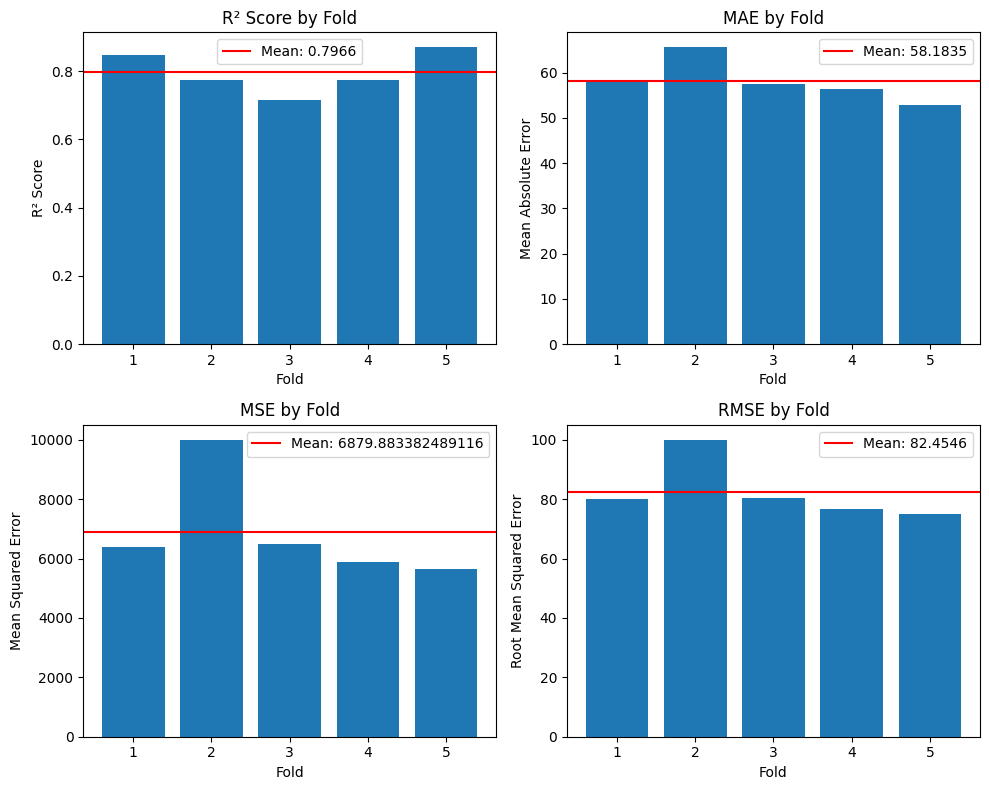

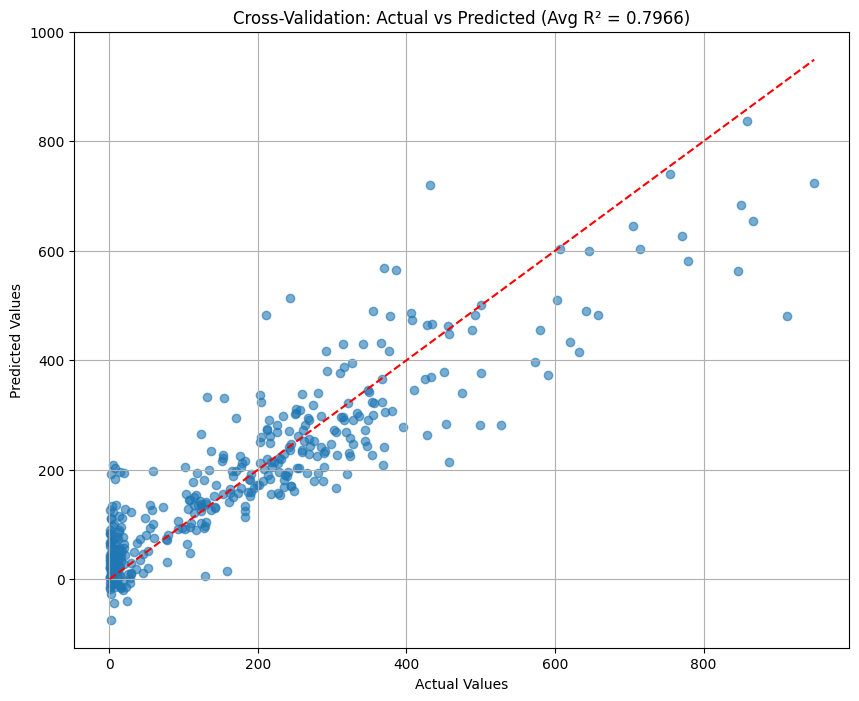

In [7]:
# Implement 5-fold cross validation
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []
fold_rmse_scores = []
all_y_true = []
all_y_pred = []

# Data preparation
data = pd.read_csv(input_data['dataset_path3'])

X = data.drop("Target", axis=1).values
y = data["Target"].values

print(f"\n{'='*20} Starting {n_folds}-Fold Cross-Validation {'='*20}")

# Loop through each fold
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    print(f"\nFold {fold_idx+1}/{n_folds}")
    
    # Split data for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Normalize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Normalize target
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()
    
    # Build and train autoencoder
    print("Training autoencoder...")
    
    def build_model(hp):
        input_dim = X_train.shape[1]
        
        # Hyperparameters to tune:
        encoder_units = hp.Int('encoder_units', min_value=8, max_value=256, step=2)
        decoder_units = hp.Int('decoder_units', min_value=8, max_value=256, step=2)
        dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.8, step=0.1)
        latent_dim = hp.Int('latent_dim', min_value=2, max_value=128, step=2)
        l1_reg = hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        
        # Input layer
        input_layer = keras.Input(shape=(input_dim,))
        
        # Encoder
        x = layers.Dense(encoder_units, activation='relu')(input_layer)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
        
        latent = layers.Dense(latent_dim, activation='linear', activity_regularizer=regularizers.l1(l1_reg), name='latent')(x)
        
        # Decoder
        x = layers.Dense(decoder_units, activation='relu')(latent)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
        output_layer = layers.Dense(input_dim, activation='linear')(x)
        
        # Define the autoencoder model
        model = keras.Model(inputs=input_layer, outputs=output_layer, name="sparse_autoencoder")
        
        # Compile the model with the tunable learning rate
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='mse')
        
        return model
    
    # For cross-validation, we'll use the tuner only in the first fold to save time
    if fold_idx == 0:
        tuner = kt.RandomSearch(
            build_model,
            objective='val_loss',
            max_trials=10,  # Reduced for cross-validation
            executions_per_trial=1,
            directory=f'hpo_dir_cv',
            project_name=f'sparse_autoencoder_cv'
        )
        
        # Search for the best hyperparameters
        tuner.search(X_train, X_train, epochs=50, validation_split=0.1, verbose=0)  # Reduced epochs for CV
        best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
        best_model = tuner.hypermodel.build(best_hps)
    else:
        # Use the same hyperparameters for subsequent folds
        best_model = tuner.hypermodel.build(best_hps)
    
    # Train the autoencoder
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = best_model.fit(X_train, X_train,
                          epochs=100,  # Reduced for cross-validation
                          batch_size=8,
                          validation_split=0.1,
                          callbacks=[early_stop],
                          verbose=0)
    
    # Create encoder for feature extraction
    encoder = keras.Model(inputs=best_model.input, outputs=best_model.get_layer("latent").output, name="encoder")
    latent_train = encoder.predict(X_train)
    latent_test = encoder.predict(X_test)
    
    print("Training regressor...")
    
    # Build and train regressor
    def build_regressor_model(hp):
        reg_input = keras.Input(shape=(latent_train.shape[1],))
        
        units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16, default=32)
        units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8, default=16)
        dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)
        
        x = layers.Dense(units_1, activation='relu')(reg_input)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
        
        x = layers.Dense(units_2, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)
        
        reg_output = layers.Dense(1, activation='linear')(x)
        
        regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")
        
        regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                          loss='mse', metrics=['mae'])
        return regressor
    
    # For regressor, similarly use tuner only in first fold
    if fold_idx == 0:
        tuner_regressor = kt.RandomSearch(
            build_regressor_model,
            objective='val_loss',
            max_trials=10,  # Reduced for cross-validation
            executions_per_trial=1,
            directory=f'hpo_regressor_dir_cv',
            project_name=f'regressor_cv'
        )
        
        tuner_regressor.search(latent_train, y_train_scaled, epochs=50, validation_split=0.1, verbose=0)
        best_reg_hps = tuner_regressor.get_best_hyperparameters(num_trials=1)[0]
        best_regressor = tuner_regressor.hypermodel.build(best_reg_hps)
    else:
        # Use the same hyperparameters for subsequent folds
        best_regressor = tuner_regressor.hypermodel.build(best_reg_hps)
    
    # Train the regressor
    reg_epochs = 100  # Reduced for cross-validation
    reg_early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reg_history = best_regressor.fit(latent_train, y_train_scaled,
                              epochs=reg_epochs,
                              batch_size=8,
                              validation_split=0.1,
                              callbacks=[reg_early_stop],
                              verbose=0)
    
    # Make predictions
    y_pred_scaled = best_regressor.predict(latent_test).flatten()
    
    # Inverse transform to original scale
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test_inv = y_test  # Original test values
    
    # Store all predictions and true values for later visualization
    all_y_true.extend(y_test_inv)
    all_y_pred.extend(y_pred)
    
    # Calculate metrics
    r2 = r2_score(y_test_inv, y_pred)
    mae = mean_absolute_error(y_test_inv, y_pred)
    mse = mean_squared_error(y_test_inv, y_pred)
    rmse = np.sqrt(mse)
    
    # Store metrics
    fold_r2_scores.append(r2)
    fold_mae_scores.append(mae)
    fold_mse_scores.append(mse)
    fold_rmse_scores.append(rmse)
    
    # Print fold results
    print(f"Fold {fold_idx+1} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")

# Calculate and print cross-validation results
print(f"\n{'='*20} Cross-Validation Results {'='*20}")
print(f"Average R² Score: {np.mean(fold_r2_scores):.4f} ± {np.std(fold_r2_scores):.4f}")
print(f"Average MAE: {np.mean(fold_mae_scores):.4f} ± {np.std(fold_mae_scores):.4f}")
print(f"Average MSE: {np.mean(fold_mse_scores):.4f} ± {np.std(fold_mse_scores):.4f}")
print(f"Average RMSE: {np.mean(fold_rmse_scores):.4f} ± {np.std(fold_rmse_scores):.4f}")

# Convert to arrays for visualization
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

# Visualize cross-validation results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.bar(range(1, n_folds+1), fold_r2_scores)
plt.axhline(y=np.mean(fold_r2_scores), color='r', linestyle='-', label=f'Mean: {np.mean(fold_r2_scores):.4f}')
plt.title('R² Score by Fold')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.bar(range(1, n_folds+1), fold_mae_scores)
plt.axhline(y=np.mean(fold_mae_scores), color='r', linestyle='-', label=f'Mean: {np.mean(fold_mae_scores):.4f}')
plt.title('MAE by Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(range(1, n_folds+1), fold_mse_scores)
plt.axhline(y=np.mean(fold_mse_scores), color='r', linestyle='-', label=f'Mean: {np.mean(fold_mse_scores):}')
plt.title('MSE by Fold')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(2, 2, 4)
plt.bar(range(1, n_folds+1), fold_rmse_scores)
plt.axhline(y=np.mean(fold_rmse_scores), color='r', linestyle='-', label=f'Mean: {np.mean(fold_rmse_scores):.4f}')
plt.title('RMSE by Fold')
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.savefig('cross_validation_metrics.png')
plt.show()

# Scatter plot of all predictions vs true values
plt.figure(figsize=(10, 8))
plt.scatter(all_y_true, all_y_pred, alpha=0.6)
plt.plot([min(all_y_true), max(all_y_true)], [min(all_y_true), max(all_y_true)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Cross-Validation: Actual vs Predicted (Avg R² = {np.mean(fold_r2_scores):.4f})')
plt.grid(True)
plt.savefig('cv_actual_vs_predicted.png')
plt.show()